Here we focus on specific interesting facts. We don't do too much statistical stuff, since these were partly covered in the preprocessing process and are not interesting and valueable for to the research

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/content/battles_1st_approach_eda.csv") # not fully representative of the 1st approaches dataset, since it includes irrelevant columns for machine learning

In [17]:
df.head()

,id,battle_time,game_mode,p1_tag,p1_trophies,p1_best_trophies,p1_wins,p1_losses,p1_battle_count,p1_crowns,...,p2_has_support_card_159000000,p1_has_support_card_159000001,p2_has_support_card_159000001,p1_has_support_card_159000002,p2_has_support_card_159000002,p1_has_support_card_159000003,p2_has_support_card_159000003,winner,p1_avg_elixir_cost,p2_avg_elixir_cost
0,1,2024-04-08 14:32:06.000000,Ladder,2J200GLG8,6911,6942,3336,2107,9197,1,...,1,0,0,0,0,0,0,1,4.00,3.62
1,3,2024-04-08 14:28:14.000000,Ranked1v1,2J200GLG8,6911,6942,3336,2107,9197,1,...,1,0,0,0,0,0,0,1,4.00,3.75
2,4,2024-04-08 15:29:20.000000,Ranked1v1,RJCYQLJJ0,9000,9000,4737,4686,10510,1,...,1,0,0,0,0,0,0,2,4.12,3.75
3,5,2024-04-08 15:24:27.000000,Ranked1v1,RJCYQLJJ0,9000,9000,4737,4686,10510,3,...,0,0,0,0,1,0,0,1,4.12,3.62
4,6,2024-04-08 15:20:10.000000,Ranked1v1,RJCYQLJJ0,9000,9000,4737,4686,10510,2,...,0,0,1,0,0,0,0,1,4.12,3.00


In [18]:
df.columns

Index(['id', 'battle_time', 'game_mode', 'p1_tag', 'p1_trophies',
       'p1_best_trophies', 'p1_wins', 'p1_losses', 'p1_battle_count',
       'p1_crowns',
       ...
       'p2_has_support_card_159000000', 'p1_has_support_card_159000001',
       'p2_has_support_card_159000001', 'p1_has_support_card_159000002',
       'p2_has_support_card_159000002', 'p1_has_support_card_159000003',
       'p2_has_support_card_159000003', 'winner', 'p1_avg_elixir_cost',
       'p2_avg_elixir_cost'],
      dtype='object', length=268)

In [19]:
# Baseline accuracy A
# What happens, if we always predict, that the player with higher win rate wins?
df_baseline_a = df[["p1_total_win_rate","p2_total_win_rate","winner"]]
df_baseline_a['predicted_winner'] = df_baseline_a.apply(lambda row: 1 if row['p1_total_win_rate'] >= row['p2_total_win_rate'] else 2, axis=1)

accuracy = accuracy_score(df_baseline_a['winner'], df_baseline_a['predicted_winner'])

print("Accuracy:", accuracy)

Accuracy: 0.5725705935445051


<ipython-input-19-6e750fb5353c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline_a['predicted_winner'] = df_baseline_a.apply(lambda row: 1 if row['p1_total_win_rate'] >= row['p2_total_win_rate'] else 2, axis=1)


In [20]:
# Baseline accuracy B
# What happens, if we always predict, that the player with less wasted elixir wins?
df_baseline_b = df[["p1_elixir_leaked", "p2_elixir_leaked", "winner"]]
df_baseline_b['predicted_winner'] = df_baseline_b.apply(lambda row: 1 if row['p1_elixir_leaked'] <= row['p2_elixir_leaked'] else 2, axis=1)

accuracy = accuracy_score(df_baseline_b['winner'], df_baseline_b['predicted_winner'])

print("Accuracy:", accuracy)

Accuracy: 0.5604504233463704


<ipython-input-20-f1996d52ce75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline_b['predicted_winner'] = df_baseline_b.apply(lambda row: 1 if row['p1_elixir_leaked'] <= row['p2_elixir_leaked'] else 2, axis=1)


Top 10 Cards with Highest Win Rate:
Card 28000001: 0.74
Card 26000064: 0.73
Card 28000008: 0.69
Card 28000011: 0.66
Card 26000055: 0.65
Card 28000023: 0.65
Card 26000000: 0.63
Card 27000012: 0.62
Card 26000004: 0.62
Card 26000041: 0.62

Last 10 Cards with Lowest Win Rate:
Card 26000099: 0.00
Card 27000005: 0.33
Card 28000024: 0.37
Card 26000068: 0.41
Card 28000006: 0.43
Card 27000001: 0.44
Card 28000016: 0.45
Card 26000074: 0.45
Card 28000013: 0.45
Card 26000067: 0.46
Card 26000097: 0.46


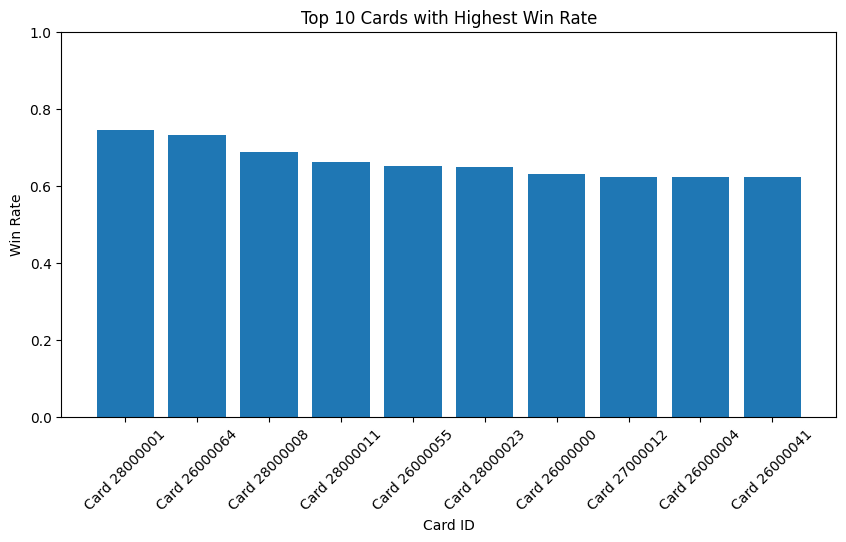

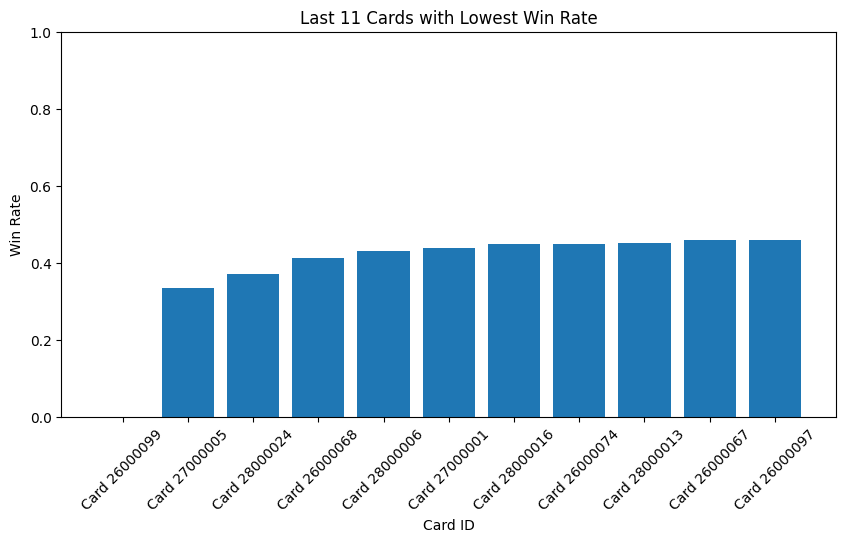

In [22]:
# win rate for each card
card_columns = [col for col in df.columns if col.startswith('p1_has_card_')]
card_win_rates = {}

for card_col in card_columns:
    card_id = card_col.split('_')[-1]
    p1_wins = df[(df[card_col] == 1) & (df['winner'] == 1)].shape[0]
    p2_wins = df[(df[f'p2_has_card_{card_id}'] == 1) & (df['winner'] == 2)].shape[0]
    both_have = df[(df[card_col] == 1) & (df[f'p2_has_card_{card_id}'] == 1)].shape[0]
    total_games = df[(df[card_col] == 1) | (df[f'p2_has_card_{card_id}'] == 1)].shape[0]

    win_rate = (p1_wins + p2_wins + 0.5 * both_have) / total_games if total_games > 0 else 0
    card_win_rates[card_id] = win_rate

# Sorted cards by win rate
top_10_cards = sorted(card_win_rates.items(), key=lambda x: x[1], reverse=True)[:10]
last_11_cards = sorted(card_win_rates.items(), key=lambda x: x[1])[:11]

# Top 10
print("Top 10 Cards with Highest Win Rate:")
for card_id, win_rate in top_10_cards:
    print(f"Card {card_id}: {win_rate:.2f}")

# Last 11
print("\nLast 10 Cards with Lowest Win Rate:")
for card_id, win_rate in last_11_cards:
    print(f"Card {card_id}: {win_rate:.2f}")

# Plot top 10
plt.figure(figsize=(10, 5))
plt.bar([f"Card {card[0]}" for card in top_10_cards], [card[1] for card in top_10_cards])
plt.xlabel('Card ID')
plt.ylabel('Win Rate')
plt.title('Top 10 Cards with Highest Win Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plot last 11
plt.figure(figsize=(10, 5))
plt.bar([f"Card {card[0]}" for card in last_11_cards], [card[1] for card in last_11_cards])
plt.xlabel('Card ID')
plt.ylabel('Win Rate')
plt.title('Last 11 Cards with Lowest Win Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


We see, that one card has a win rate of 0. This is not a mistake. It is the newest card in the game and was not played back then, when the matches were retrieved from the Clash Royale API.

Top 10 Cards with Highest Use Rate:
Card 28000001: 0.45
Card 26000064: 0.42
Card 28000008: 0.31
Card 28000011: 0.31
Card 26000055: 0.29
Card 26000000: 0.25
Card 26000011: 0.24
Card 26000004: 0.23
Card 26000041: 0.22
Card 26000010: 0.21

Last 11 Cards with Lowest Use Rate:
Card 26000099: 0.00
Card 27000005: 0.00
Card 28000016: 0.00
Card 26000028: 0.00
Card 28000024: 0.01
Card 26000053: 0.01
Card 26000068: 0.01
Card 26000096: 0.01
Card 27000001: 0.01
Card 26000097: 0.01
Card 28000013: 0.01


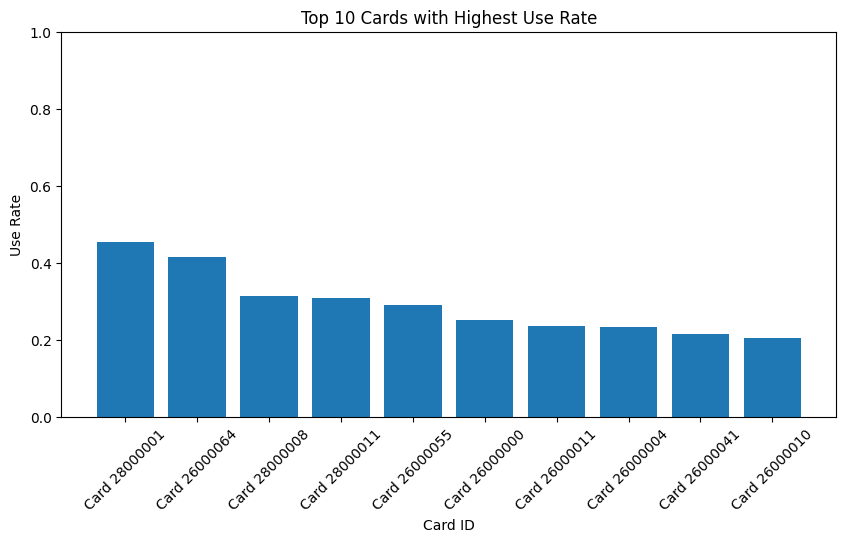

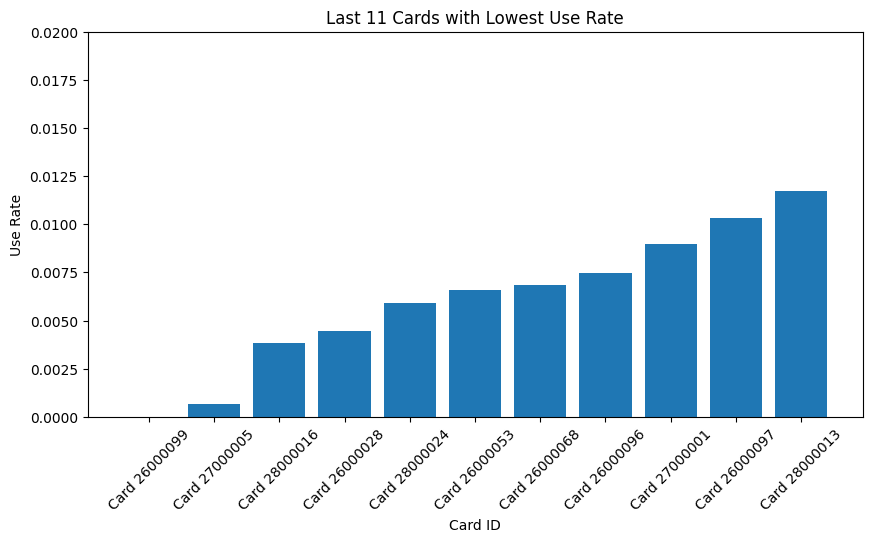

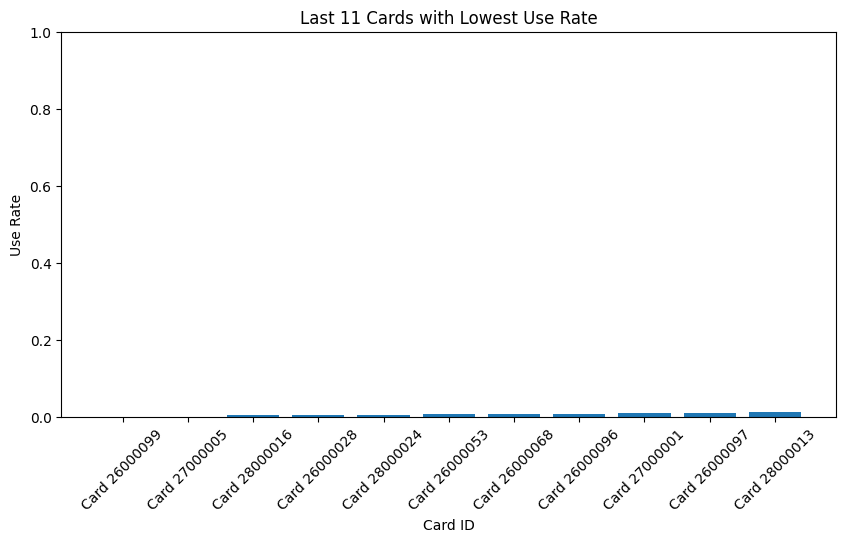

In [23]:
# use rate for each card
card_columns = [col for col in df.columns if col.startswith('p1_has_card_')]
card_use_rates = {}

total_possible_uses = len(df) * 2
for card_col in card_columns:
    card_id = card_col.split('_')[-1]
    p1_has_card = df[card_col]
    p2_has_card = df[f'p2_has_card_{card_id}']

    use_count = (p1_has_card + p2_has_card).sum() + df[(p1_has_card == 1) & (p2_has_card == 1)].shape[0]
    card_use_rates[card_id] = use_count / total_possible_uses

# Sorted cards by use rate
top_10_cards = sorted(card_use_rates.items(), key=lambda x: x[1], reverse=True)[:10]
last_11_cards = sorted(card_use_rates.items(), key=lambda x: x[1])[:11]

# Top 10
print("Top 10 Cards with Highest Use Rate:")
for card_id, use_rate in top_10_cards:
    print(f"Card {card_id}: {use_rate:.2f}")

# Last 11
print("\nLast 11 Cards with Lowest Use Rate:")
for card_id, use_rate in last_11_cards:
    print(f"Card {card_id}: {use_rate:.2f}")

# Top 10 plot
plt.figure(figsize=(10, 5))
plt.bar([f"Card {card[0]}" for card in top_10_cards], [card[1] for card in top_10_cards])
plt.xlabel('Card ID')
plt.ylabel('Use Rate')
plt.title('Top 10 Cards with Highest Use Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Last 11 plot
plt.figure(figsize=(10, 5))
plt.bar([f"Card {card[0]}" for card in last_11_cards], [card[1] for card in last_11_cards])
plt.xlabel('Card ID')
plt.ylabel('Use Rate')
plt.title('Last 11 Cards with Lowest Use Rate')
plt.ylim(0, 0.02)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 5))
plt.bar([f"Card {card[0]}" for card in last_11_cards], [card[1] for card in last_11_cards])
plt.xlabel('Card ID')
plt.ylabel('Use Rate')
plt.title('Last 11 Cards with Lowest Use Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [24]:
df.columns

Index(['id', 'battle_time', 'game_mode', 'p1_tag', 'p1_trophies',
       'p1_best_trophies', 'p1_wins', 'p1_losses', 'p1_battle_count',
       'p1_crowns',
       ...
       'p2_has_support_card_159000000', 'p1_has_support_card_159000001',
       'p2_has_support_card_159000001', 'p1_has_support_card_159000002',
       'p2_has_support_card_159000002', 'p1_has_support_card_159000003',
       'p2_has_support_card_159000003', 'winner', 'p1_avg_elixir_cost',
       'p2_avg_elixir_cost'],
      dtype='object', length=268)

In [25]:
df = pd.read_csv("/content/battles_1st_approach_eda.csv")

In [32]:
df["p1_avg_elixir_cost"].mean()

3.6317157347315945

In [33]:
df["p2_avg_elixir_cost"].mean()

3.663440710018481

In [34]:
#avg. elixir cost
((df["p1_avg_elixir_cost"].mean() + df["p2_avg_elixir_cost"].mean()) / 2).round(2)

3.65

In [35]:
df["p1_elixir_leaked"].mean()

3.8943658400309453

In [36]:
df["p2_elixir_leaked"].mean()

3.9375729574074874

In [31]:
#avg. elixir leaked
((df["p1_elixir_leaked"].mean() + df["p2_elixir_leaked"].mean()) / 2).round(2)

3.92

In [37]:
df["p1_total_win_rate"].mean()

1.2022336356212664

In [38]:
df["p2_total_win_rate"].mean()

1.153660979069068

In [39]:
#avg. elixir leaked
((df["p1_total_win_rate"].mean() + df["p2_total_win_rate"].mean()) / 2).round(2)

1.18

In [42]:
#2nd approach
df = pd.read_csv("/content/battles_2nd_approach_eda.csv", sep=";")

In [43]:
df.columns

Index(['winner', 'p1_avg_elixir_cost_normalized', 'p1_elixir_leaked',
       'p1_has_support_card_159000000', 'p1_has_support_card_159000001',
       'p1_has_support_card_159000002', 'p1_has_support_card_159000003',
       'p1_total_win_rate', 'p2_avg_elixir_cost_normalized',
       'p2_elixir_leaked', 'p2_has_support_card_159000000',
       'p2_has_support_card_159000001', 'p2_has_support_card_159000002',
       'p2_has_support_card_159000003', 'p2_total_win_rate',
       'p1_Air-Ground-Single-Attack', 'p2_Air-Ground-Single-Attack',
       'p1_Air-Ground-Splash-Attack', 'p2_Air-Ground-Splash-Attack',
       'p1_Building', 'p2_Building', 'p1_Detonation-Damage',
       'p2_Detonation-Damage', 'p1_Earthquake-Spell', 'p2_Earthquake-Spell',
       'p1_Ground-Single-Attack', 'p2_Ground-Single-Attack',
       'p1_Ground-Splash-Attack', 'p2_Ground-Splash-Attack', 'p1_Heal-Skill',
       'p2_Heal-Skill', 'p1_High-Air-Damage-Spell', 'p2_High-Air-Damage-Spell',
       'p1_High-Damage', 'p2_High-

In [44]:
# We want to focus on card categories
card_category_columns = [
    'p1_Air-Ground-Single-Attack', 'p2_Air-Ground-Single-Attack',
    'p1_Air-Ground-Splash-Attack', 'p2_Air-Ground-Splash-Attack',
    'p1_Building', 'p2_Building', 'p1_Detonation-Damage',
    'p2_Detonation-Damage', 'p1_Earthquake-Spell', 'p2_Earthquake-Spell',
    'p1_Ground-Single-Attack', 'p2_Ground-Single-Attack',
    'p1_Ground-Splash-Attack', 'p2_Ground-Splash-Attack', 'p1_Heal-Skill',
    'p2_Heal-Skill', 'p1_High-Air-Damage-Spell', 'p2_High-Air-Damage-Spell',
    'p1_High-Damage', 'p2_High-Damage', 'p1_Inferno-Attack',
    'p2_Inferno-Attack', 'p1_Low-Air-Damage-Spell',
    'p2_Low-Air-Damage-Spell', 'p1_Low-Ground-Damage-Spell',
    'p2_Low-Ground-Damage-Spell', 'p1_Mid-Air-Damage-Spell',
    'p2_Mid-Air-Damage-Spell', 'p1_Monk', 'p2_Monk', 'p1_Mover-Skill',
    'p2_Mover-Skill', 'p1_Prone-To-Zap', 'p2_Prone-To-Zap',
    'p1_Shielded-Health', 'p2_Shielded-Health', 'p1_Single-Air-High-Health',
    'p2_Single-Air-High-Health', 'p1_Single-Air-Medium-Health',
    'p2_Single-Air-Medium-Health', 'p1_Single-Ground-High-Health',
    'p2_Single-Ground-High-Health', 'p1_Single-Ground-Low-Health',
    'p2_Single-Ground-Low-Health', 'p1_Single-Ground-Medium-Health',
    'p2_Single-Ground-Medium-Health', 'p1_Slow-Down-Attack',
    'p2_Slow-Down-Attack', 'p1_Spawnable-Everywhere',
    'p2_Spawnable-Everywhere', 'p1_Spawns-Troops', 'p2_Spawns-Troops',
    'p1_Straight-Tower-Building-Attack',
    'p2_Straight-Tower-Building-Attack', 'p1_Troop-Air-Low-Health',
    'p2_Troop-Air-Low-Health', 'p1_Troop-Air-Medium-Health',
    'p2_Troop-Air-Medium-Health', 'p1_Troop-Ground-Low-Health',
    'p2_Troop-Ground-Low-Health', 'p1_Troop-Ground-Medium-Health',
    'p2_Troop-Ground-Medium-Health', 'p1_Utility-Spell', 'p2_Utility-Spell',
    'p1_Zap-Attack', 'p2_Zap-Attack'
]

# Calculate the mean over all rows for each column
mean_values = df[card_category_columns].mean()

sorted_mean_values = mean_values.sort_values(ascending=False)

print("Mean Values for All Card Categories (Sorted by Highest Value):")
for column, mean_value in sorted_mean_values.items():
    print(f"{column}: {mean_value:.2f}")

Mean Values for All Card Categories (Sorted by Highest Value):
p2_Single-Ground-Medium-Health: 3.00
p1_Single-Ground-Medium-Health: 2.78
p2_Ground-Single-Attack: 2.69
p1_Ground-Single-Attack: 2.64
p1_Air-Ground-Single-Attack: 1.34
p2_Air-Ground-Single-Attack: 1.32
p2_Troop-Ground-Low-Health: 1.29
p2_Air-Ground-Splash-Attack: 1.19
p1_Troop-Ground-Low-Health: 1.18
p1_Air-Ground-Splash-Attack: 1.12
p1_Straight-Tower-Building-Attack: 0.96
p1_Single-Ground-Low-Health: 0.96
p2_Straight-Tower-Building-Attack: 0.92
p2_High-Damage: 0.92
p2_Ground-Splash-Attack: 0.91
p1_High-Damage: 0.90
p2_Single-Ground-Low-Health: 0.90
p1_Mid-Air-Damage-Spell: 0.82
p1_Ground-Splash-Attack: 0.81
p2_Mover-Skill: 0.80
p2_Mid-Air-Damage-Spell: 0.76
p1_Mover-Skill: 0.75
p2_Single-Ground-High-Health: 0.73
p1_Single-Ground-High-Health: 0.70
p1_Prone-To-Zap: 0.66
p2_Prone-To-Zap: 0.64
p1_Detonation-Damage: 0.58
p1_Low-Air-Damage-Spell: 0.57
p1_Building: 0.54
p2_Low-Air-Damage-Spell: 0.53
p1_Zap-Attack: 0.51
p2_Buildin